In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import tabulate

In [229]:
Alkali_test = pd.read_excel('C. Alkali test.xlsx', usecols='B:E, G:J, L:O', skiprows = 1)

Alkali_test['Type'] = "K" + Alkali_test['K-content'].astype(str) + ", " + \
                      "Na"+ Alkali_test["Na-content"].astype(str) 
Alkali_test['Type2'] = "Na" + Alkali_test['Na-content'].astype(str) + ", " + \
                      "K"+ Alkali_test["K-content"].astype(str) 
Alkali_test['PL-Voc'] = (Alkali_test['Voc [V]'] - Alkali_test['Voc [V].1'])/ Alkali_test['Voc [V]']
Alkali_test['PL-Isc'] = (Alkali_test['Isc [A]'] - Alkali_test['Isc [A].1'])/ Alkali_test['Isc [A]']
Alkali_test['PL-FF']  = (Alkali_test['FF [%]'] -  Alkali_test['FF [%].1']) / Alkali_test['FF [%]']
Alkali_test['PL-η']   = (Alkali_test['η [%]'] -   Alkali_test['η [%].1'])  / Alkali_test['η [%]']

Alkali_test.tail()

,Id,K-content,Na-content,Storage,Voc [V],Isc [A],FF [%],η [%],Voc [V].1,Isc [A].1,FF [%].1,η [%].1,Type,Type2,PL-Voc,PL-Isc,PL-FF,PL-η
139,1511091236,40,70,IV-room,0.627,6.567,65.099998,11.901,0.625,6.537,65.699997,11.915,"K40, Na70","Na70, K40",0.003190,0.004568,-0.009217,-0.001176
140,1511091237,40,90,IV-room,0.626,6.558,67.300003,12.270,0.623,6.506,66.099998,11.892,"K40, Na90","Na90, K40",0.004792,0.007929,0.017831,0.030807
141,1511091238,40,90,IV-room,0.623,6.508,64.599998,11.626,0.620,6.486,64.199997,11.466,"K40, Na90","Na90, K40",0.004815,0.003380,0.006192,0.013762
142,1511091239,40,90,IV-room,0.625,6.424,67.699997,12.061,0.622,6.406,67.099998,11.875,"K40, Na90","Na90, K40",0.004800,0.002802,0.008863,0.015422
143,1511091240,40,90,IV-room,0.628,6.407,69.300003,12.381,0.623,6.389,67.800003,11.972,"K40, Na90","Na90, K40",0.007962,0.002809,0.021645,0.033034


# Check: Voc

In [265]:
Alkali_test_V = Alkali_test[(Alkali_test['PL-Voc'] < 0.1) & (Alkali_test['PL-Voc'] > -0.1)]
Alkali_test_V_N2 = Alkali_test_V[Alkali_test_V['Storage'] == "N2-storage"]
Alkali_test_V_IV = Alkali_test_V[Alkali_test_V['Storage'] == "IV-room"]

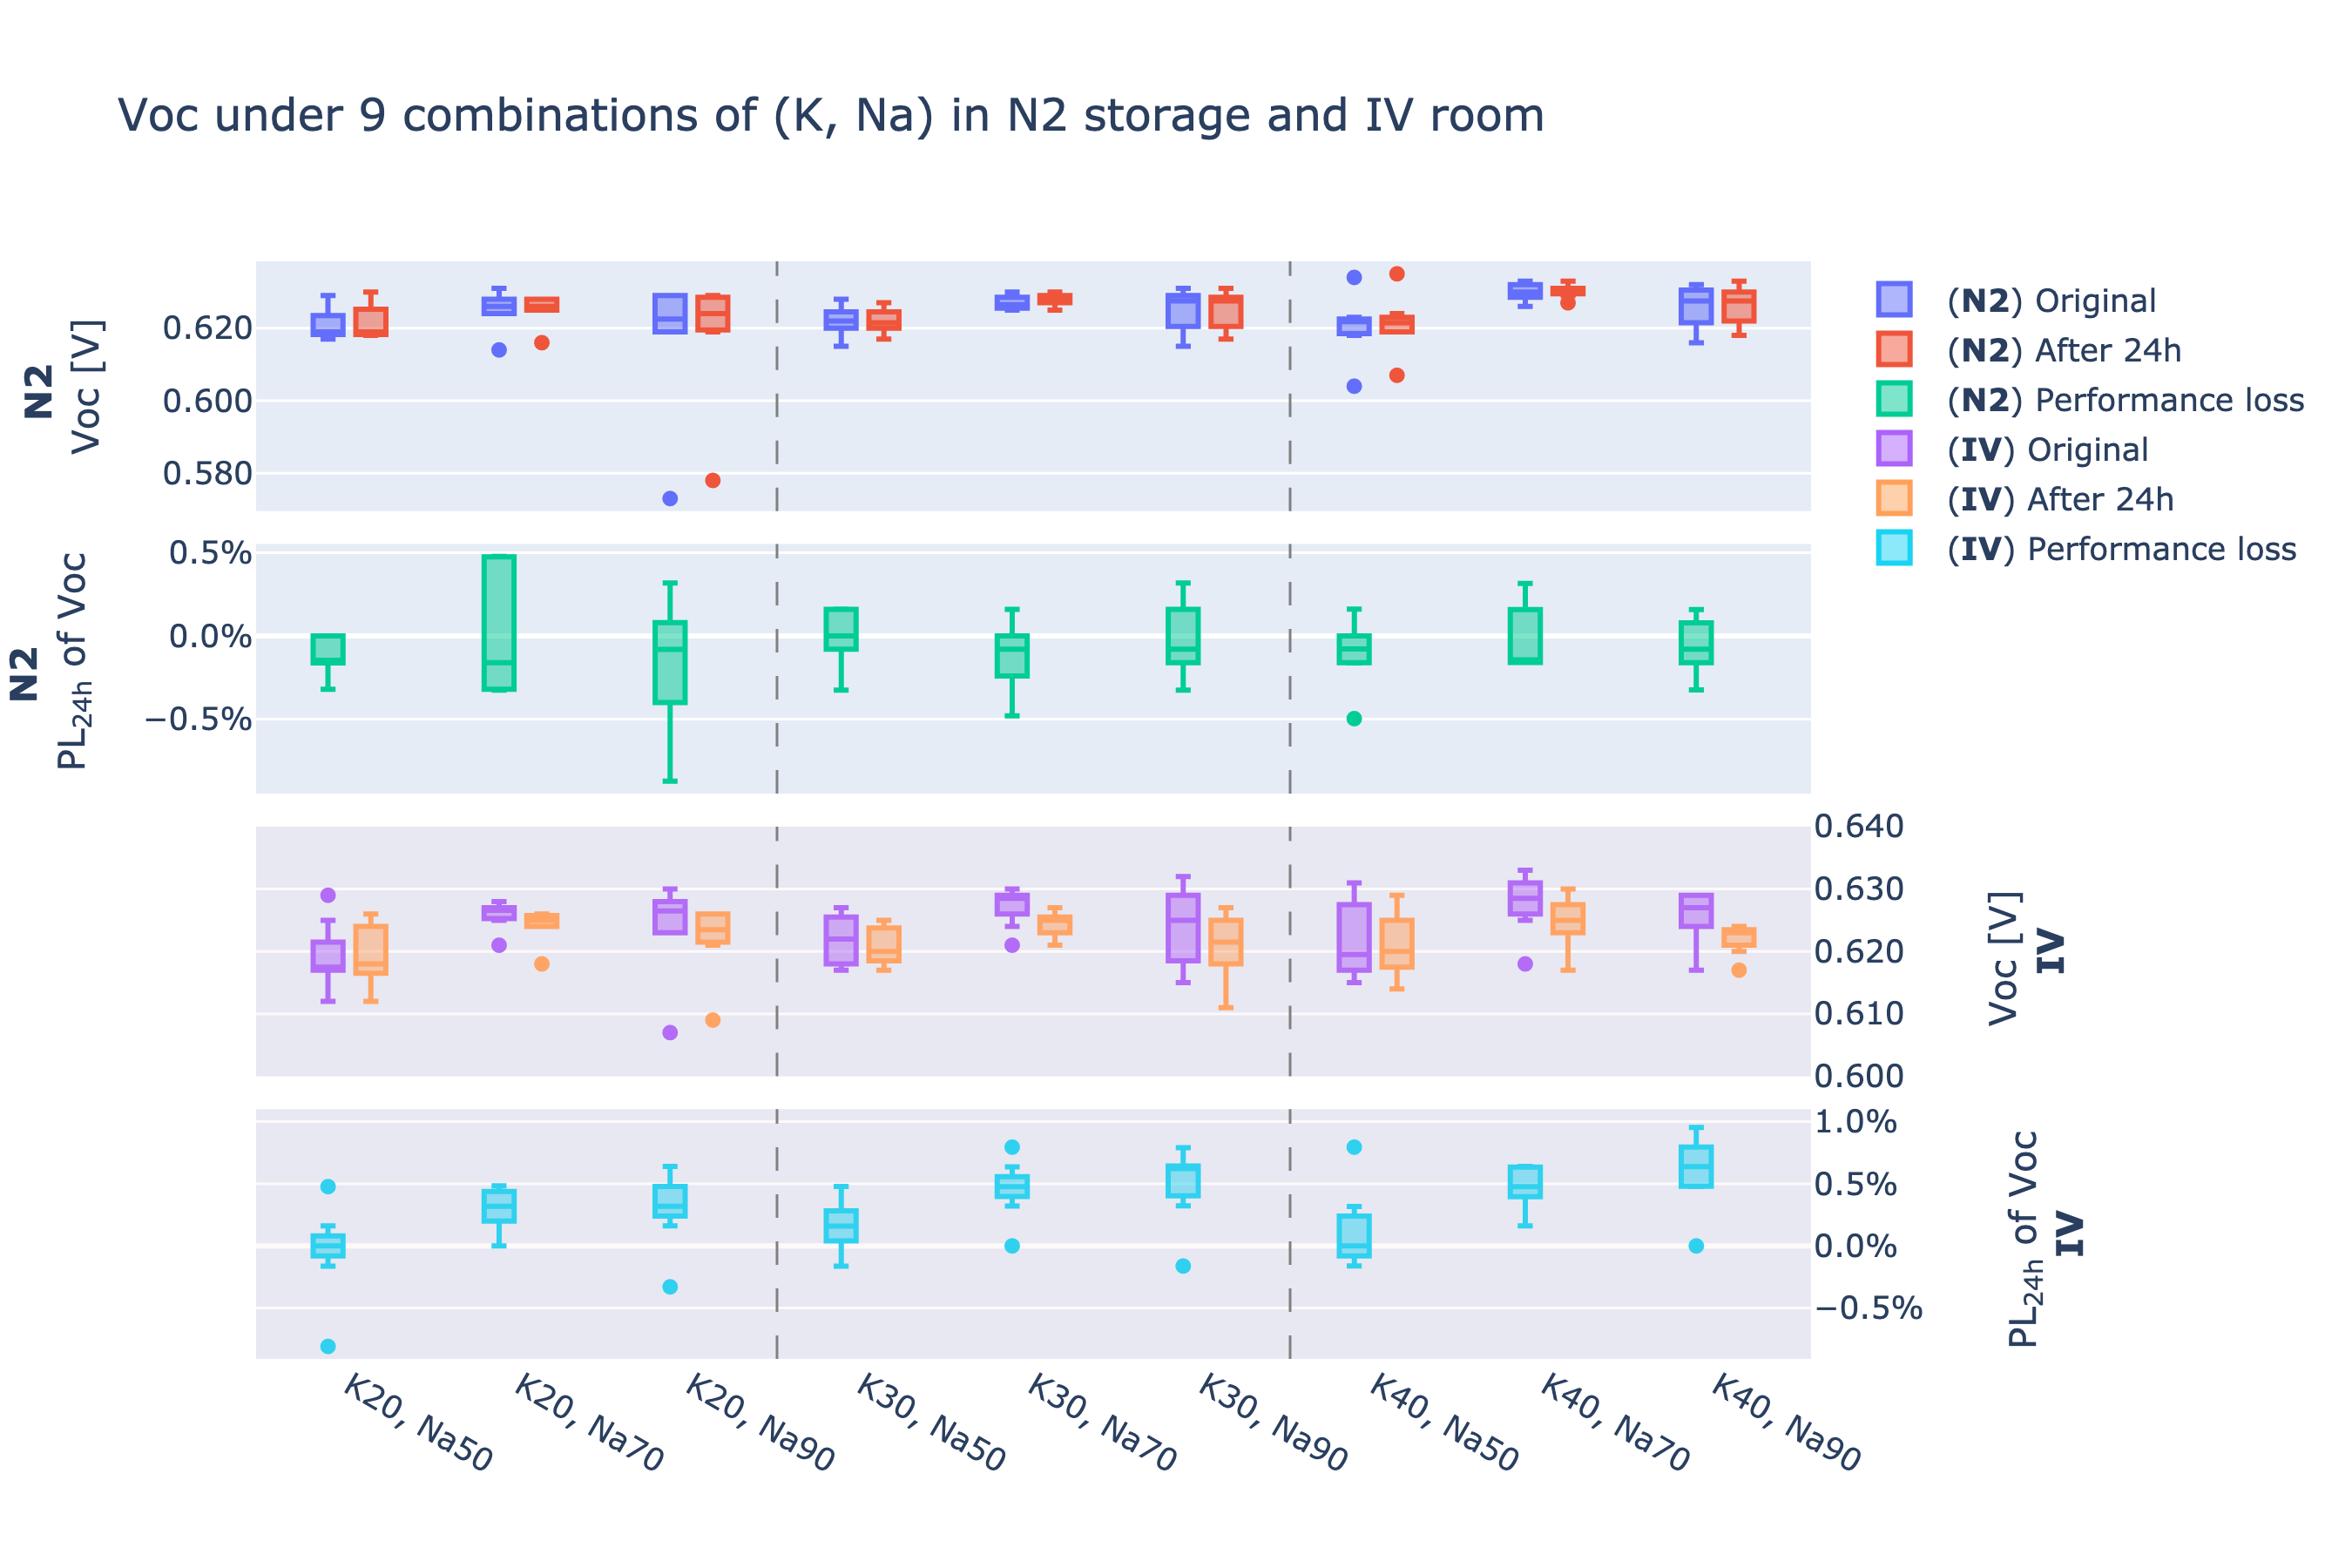

In [280]:
fig_Alkali_V = make_subplots(rows=4, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_N2['Voc [V]'], x = Alkali_test_V_N2["Type"], 
           name = "(<b>N2</b>) Original", offsetgroup = "A"),
    row=1, col=1
)

fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_N2['Voc [V].1'], x = Alkali_test_V_N2["Type"], 
           name = "(<b>N2</b>) After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_N2['PL-Voc'], x = Alkali_test_V_N2["Type"], 
           name = "(<b>N2</b>) Performance loss", offsetgroup = "A"),
    row=2, col=1
)
#########
fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_IV['Voc [V]'], x = Alkali_test_V_IV["Type"], 
           name = "(<b>IV</b>) Original", offsetgroup = "A"),
    row=3, col=1
)

fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_IV['Voc [V].1'], x = Alkali_test_V_IV["Type"], 
           name = "(<b>IV</b>) After 24h", offsetgroup = "B"),
    row=3, col=1
)


fig_Alkali_V.add_trace(
    go.Box(y=Alkali_test_V_IV['PL-Voc'], x = Alkali_test_V_IV["Type"], 
           name = "(<b>IV</b>) Performance loss", offsetgroup = "A"),
    row=4, col=1
)
#
fig_Alkali_V.add_hrect(y0=0.6, y1=0.64, col="all", row=3,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_V.add_hrect(y0=-0.009, y1=0.011, col="all", row=4,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_V.add_vline(
        x=2.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_V.add_vline(
        x=5.5, line_width=1, line_dash="dash", 
        line_color="grey")
#

fig_Alkali_V.update_layout(title = "Voc under 9 combinations of (K, Na) in N2 storage and IV room",
                     boxmode='group', height=700, width=900,boxgap=0.5,
                     yaxis=dict(title="<b>N2</b> <br>Voc [V]",tickformat=".3f"),
                     yaxis2=dict(title="<b>N2</b> <br> PL<sub>24h</sub> of Voc",tickformat = ',.1%'),
                     yaxis3=dict(title="Voc [V] <br><b>IV</b>",side='right',tickformat=".3f"),
                     yaxis4=dict(title="PL<sub>24h</sub> of Voc <br><b>IV</b>",side='right',tickformat = ',.1%')
                    )
fig_Alkali_V.update_xaxes(tickangle=30) 
fig_Alkali_V.show(renderer="png", scale=3, width=900, height=600)
fig_Alkali_V.write_image("3.1 Voc under 9 combinations of (K, Na) in N2 storage and IV room.png", scale=3, width=900, height=600) 

# Check: Isc

In [270]:
Alkali_test_I = Alkali_test[(Alkali_test['PL-Isc'] < 0.1) & (Alkali_test['PL-Isc'] > -0.1)]
Alkali_test_I_N2 = Alkali_test_I[Alkali_test_I['Storage'] == "N2-storage"]
Alkali_test_I_IV = Alkali_test_I[Alkali_test_I['Storage'] == "IV-room"]

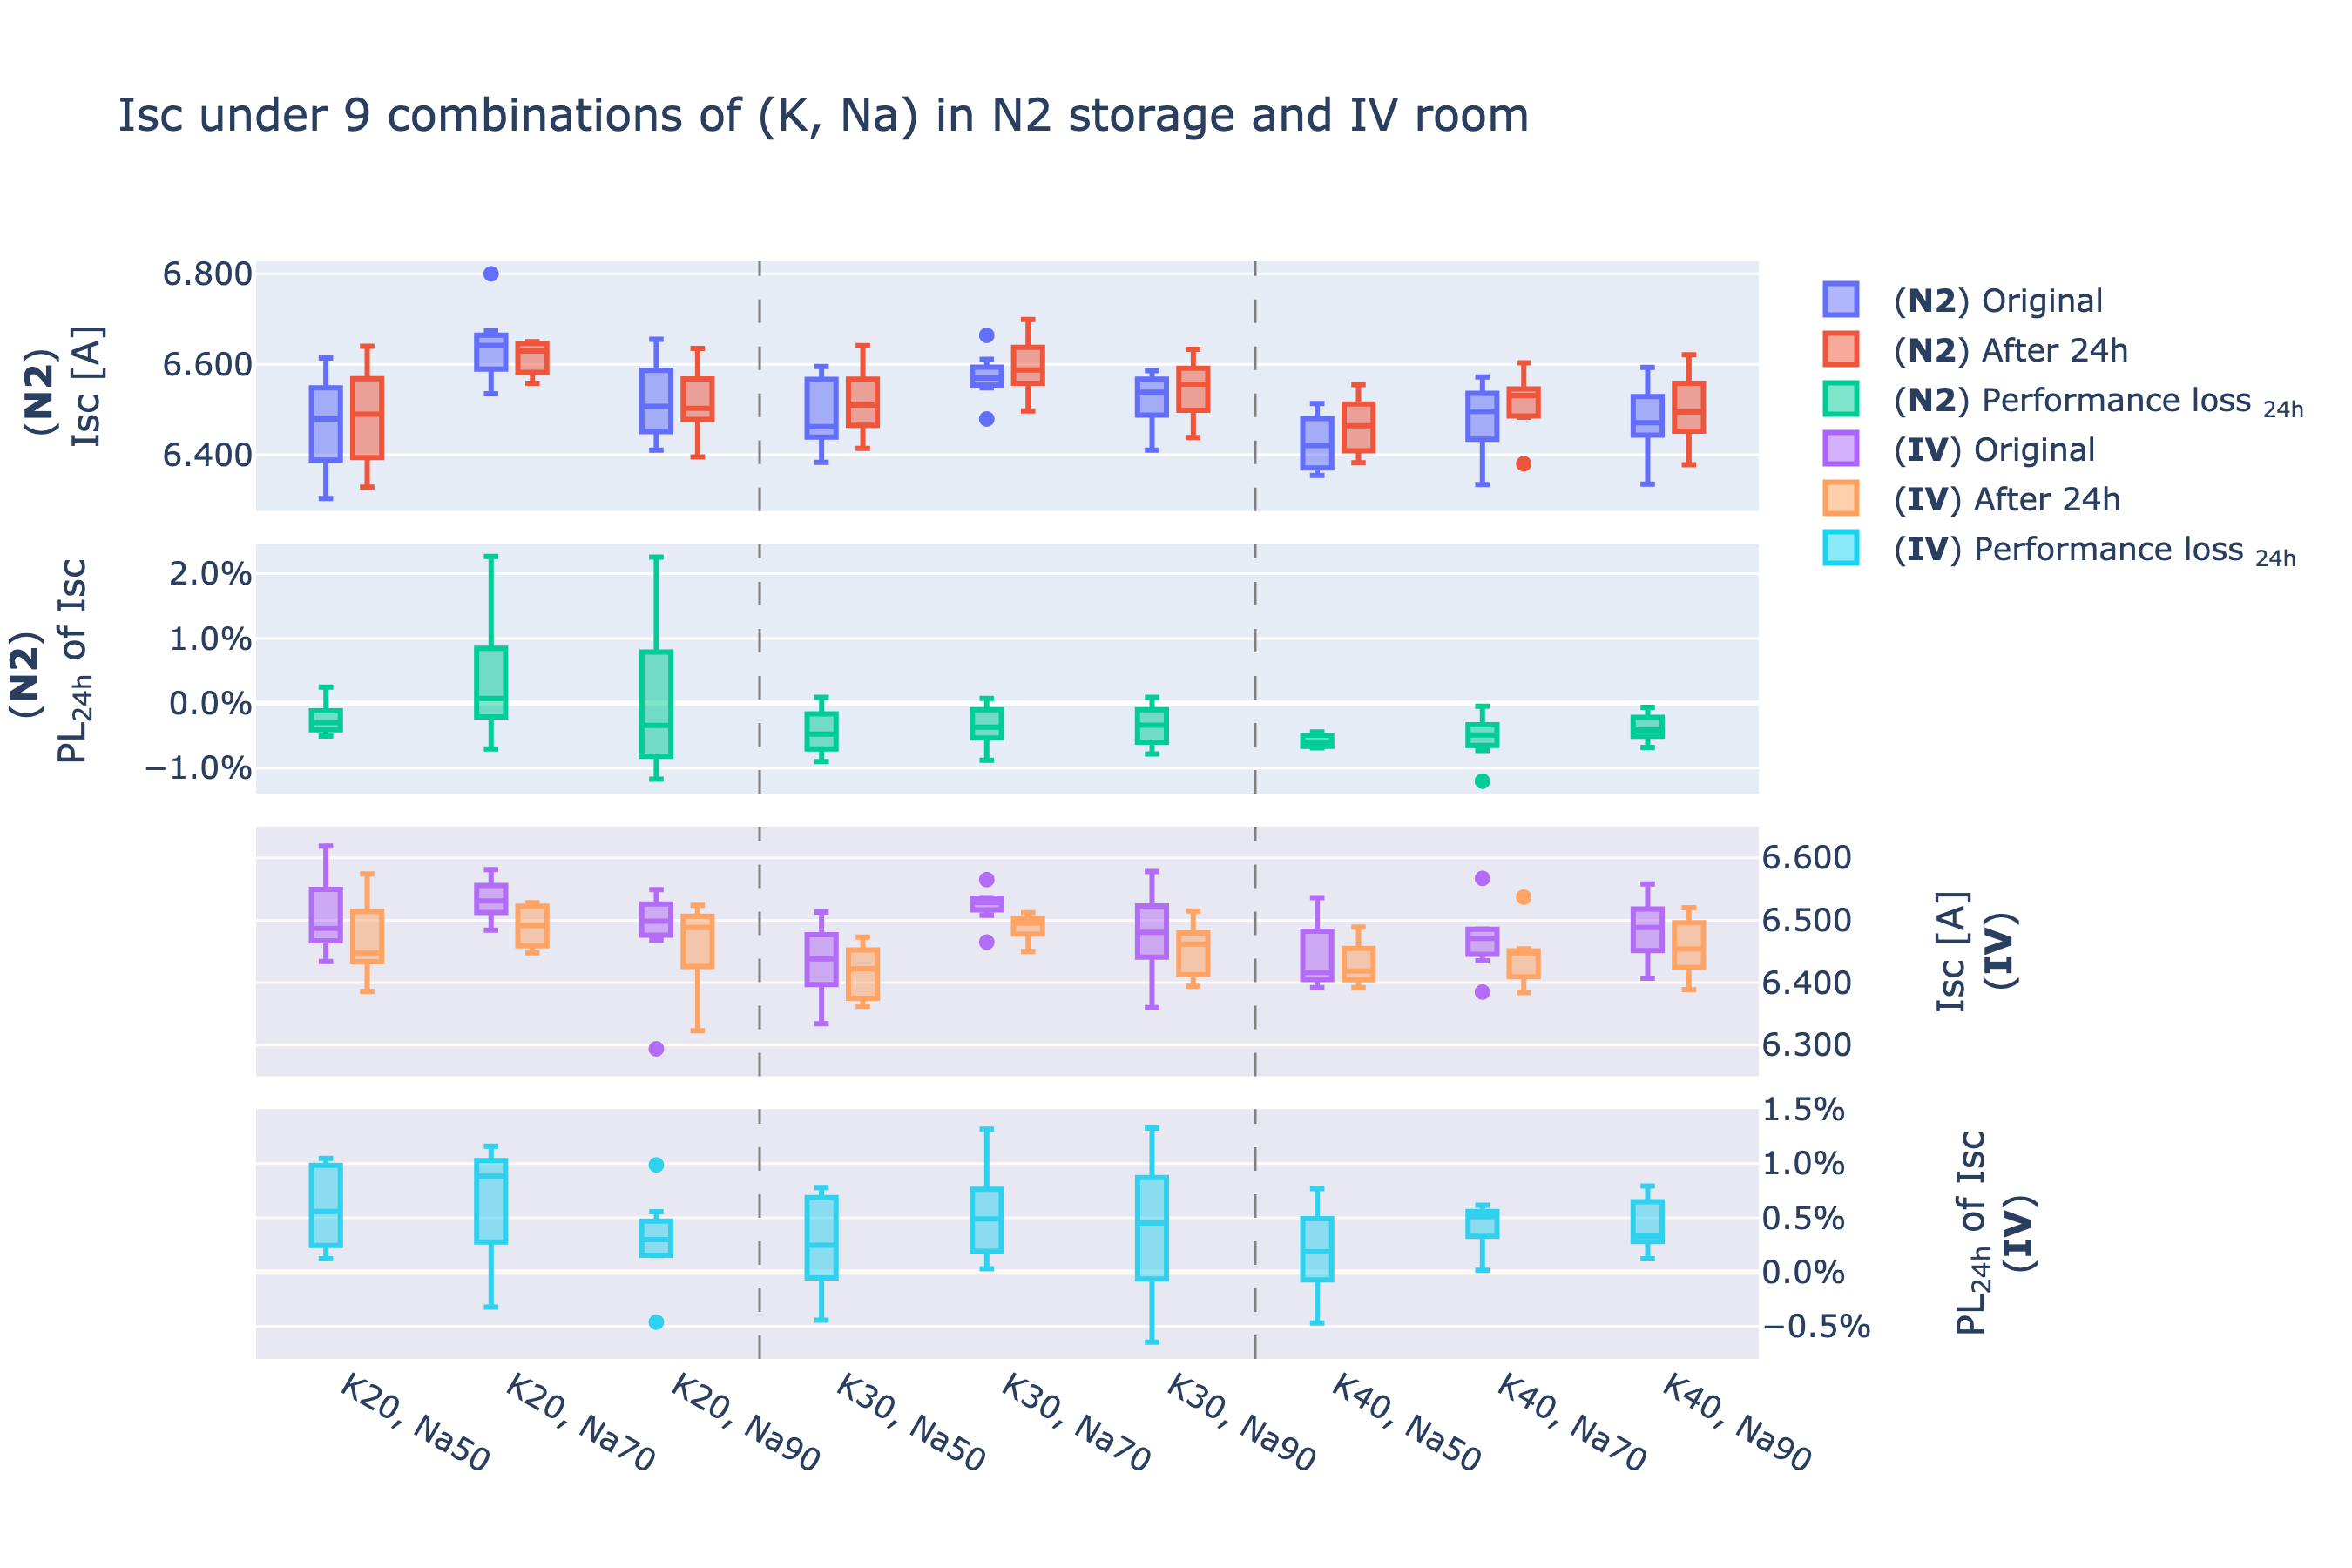

In [281]:
fig_Alkali_I = make_subplots(rows=4, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_N2['Isc [A]'], x = Alkali_test_I_N2["Type"], 
           name = "(<b>N2</b>) Original", offsetgroup = "A"),
    row=1, col=1
)

fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_N2['Isc [A].1'], x = Alkali_test_I_N2["Type"], 
           name = "(<b>N2</b>) After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_N2['PL-Isc'], x = Alkali_test_I_N2["Type"], 
           name = "(<b>N2</b>) Performance loss <sub>24h</sub>", offsetgroup = "A"),
    row=2, col=1
)
#########
fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_IV['Isc [A]'], x = Alkali_test_I_IV["Type"], 
           name = "(<b>IV</b>) Original", offsetgroup = "A"),
    row=3, col=1
)

fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_IV['Isc [A].1'], x = Alkali_test_I_IV["Type"], 
           name = "(<b>IV</b>) After 24h", offsetgroup = "B"),
    row=3, col=1
)


fig_Alkali_I.add_trace(
    go.Box(y=Alkali_test_I_IV['PL-Isc'], x = Alkali_test_I_IV["Type"], 
           name = "(<b>IV</b>) Performance loss <sub>24h</sub>", offsetgroup = "A"),
    row=4, col=1
)
###
fig_Alkali_I.add_hrect(y0=6.25, y1=6.65, col="all", row=3,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_I.add_hrect(y0=-0.008, y1=0.015, col="all", row=4,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_I.add_vline(
        x=2.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_I.add_vline(
        x=5.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_I.update_layout(title = "Isc under 9 combinations of (K, Na) in N2 storage and IV room",
                     boxmode='group', height=700, width=900,boxgap=0.5,
                     yaxis=dict(title="(<b>N2</b>) <br>Isc [A]",tickformat=".3f"),
                     yaxis2=dict(title="(<b>N2</b>) <br> PL<sub>24h</sub> of Isc",tickformat = ',.1%'),
                     yaxis3=dict(title="Isc [A]<br>(<b>IV</b>)",side='right',tickformat=".3f"),
                     yaxis4=dict(title="PL<sub>24h</sub> of Isc<br>(<b>IV</b>)",side='right',tickformat = ',.1%')
                    ) 
fig_Alkali_I.update_xaxes(tickangle=30) 
fig_Alkali_I.show(renderer="png", scale=3, width=900, height=600)
fig_Alkali_I.write_image("3.2 Isc under 9 combinations of (K, Na) in N2 storage and IV room.png", scale=3, width=900, height=600) 

# Check: Fill Factor , FF

In [272]:
Alkali_test_FF = Alkali_test[Alkali_test['PL-FF'] < 0.1]
Alkali_test_FF = Alkali_test_FF[Alkali_test_FF['PL-FF'] > -0.1]
Alkali_test_FF_N2 = Alkali_test_FF[Alkali_test_FF['Storage'] == "N2-storage"]
Alkali_test_FF_IV = Alkali_test_FF[Alkali_test_FF['Storage'] == "IV-room"]

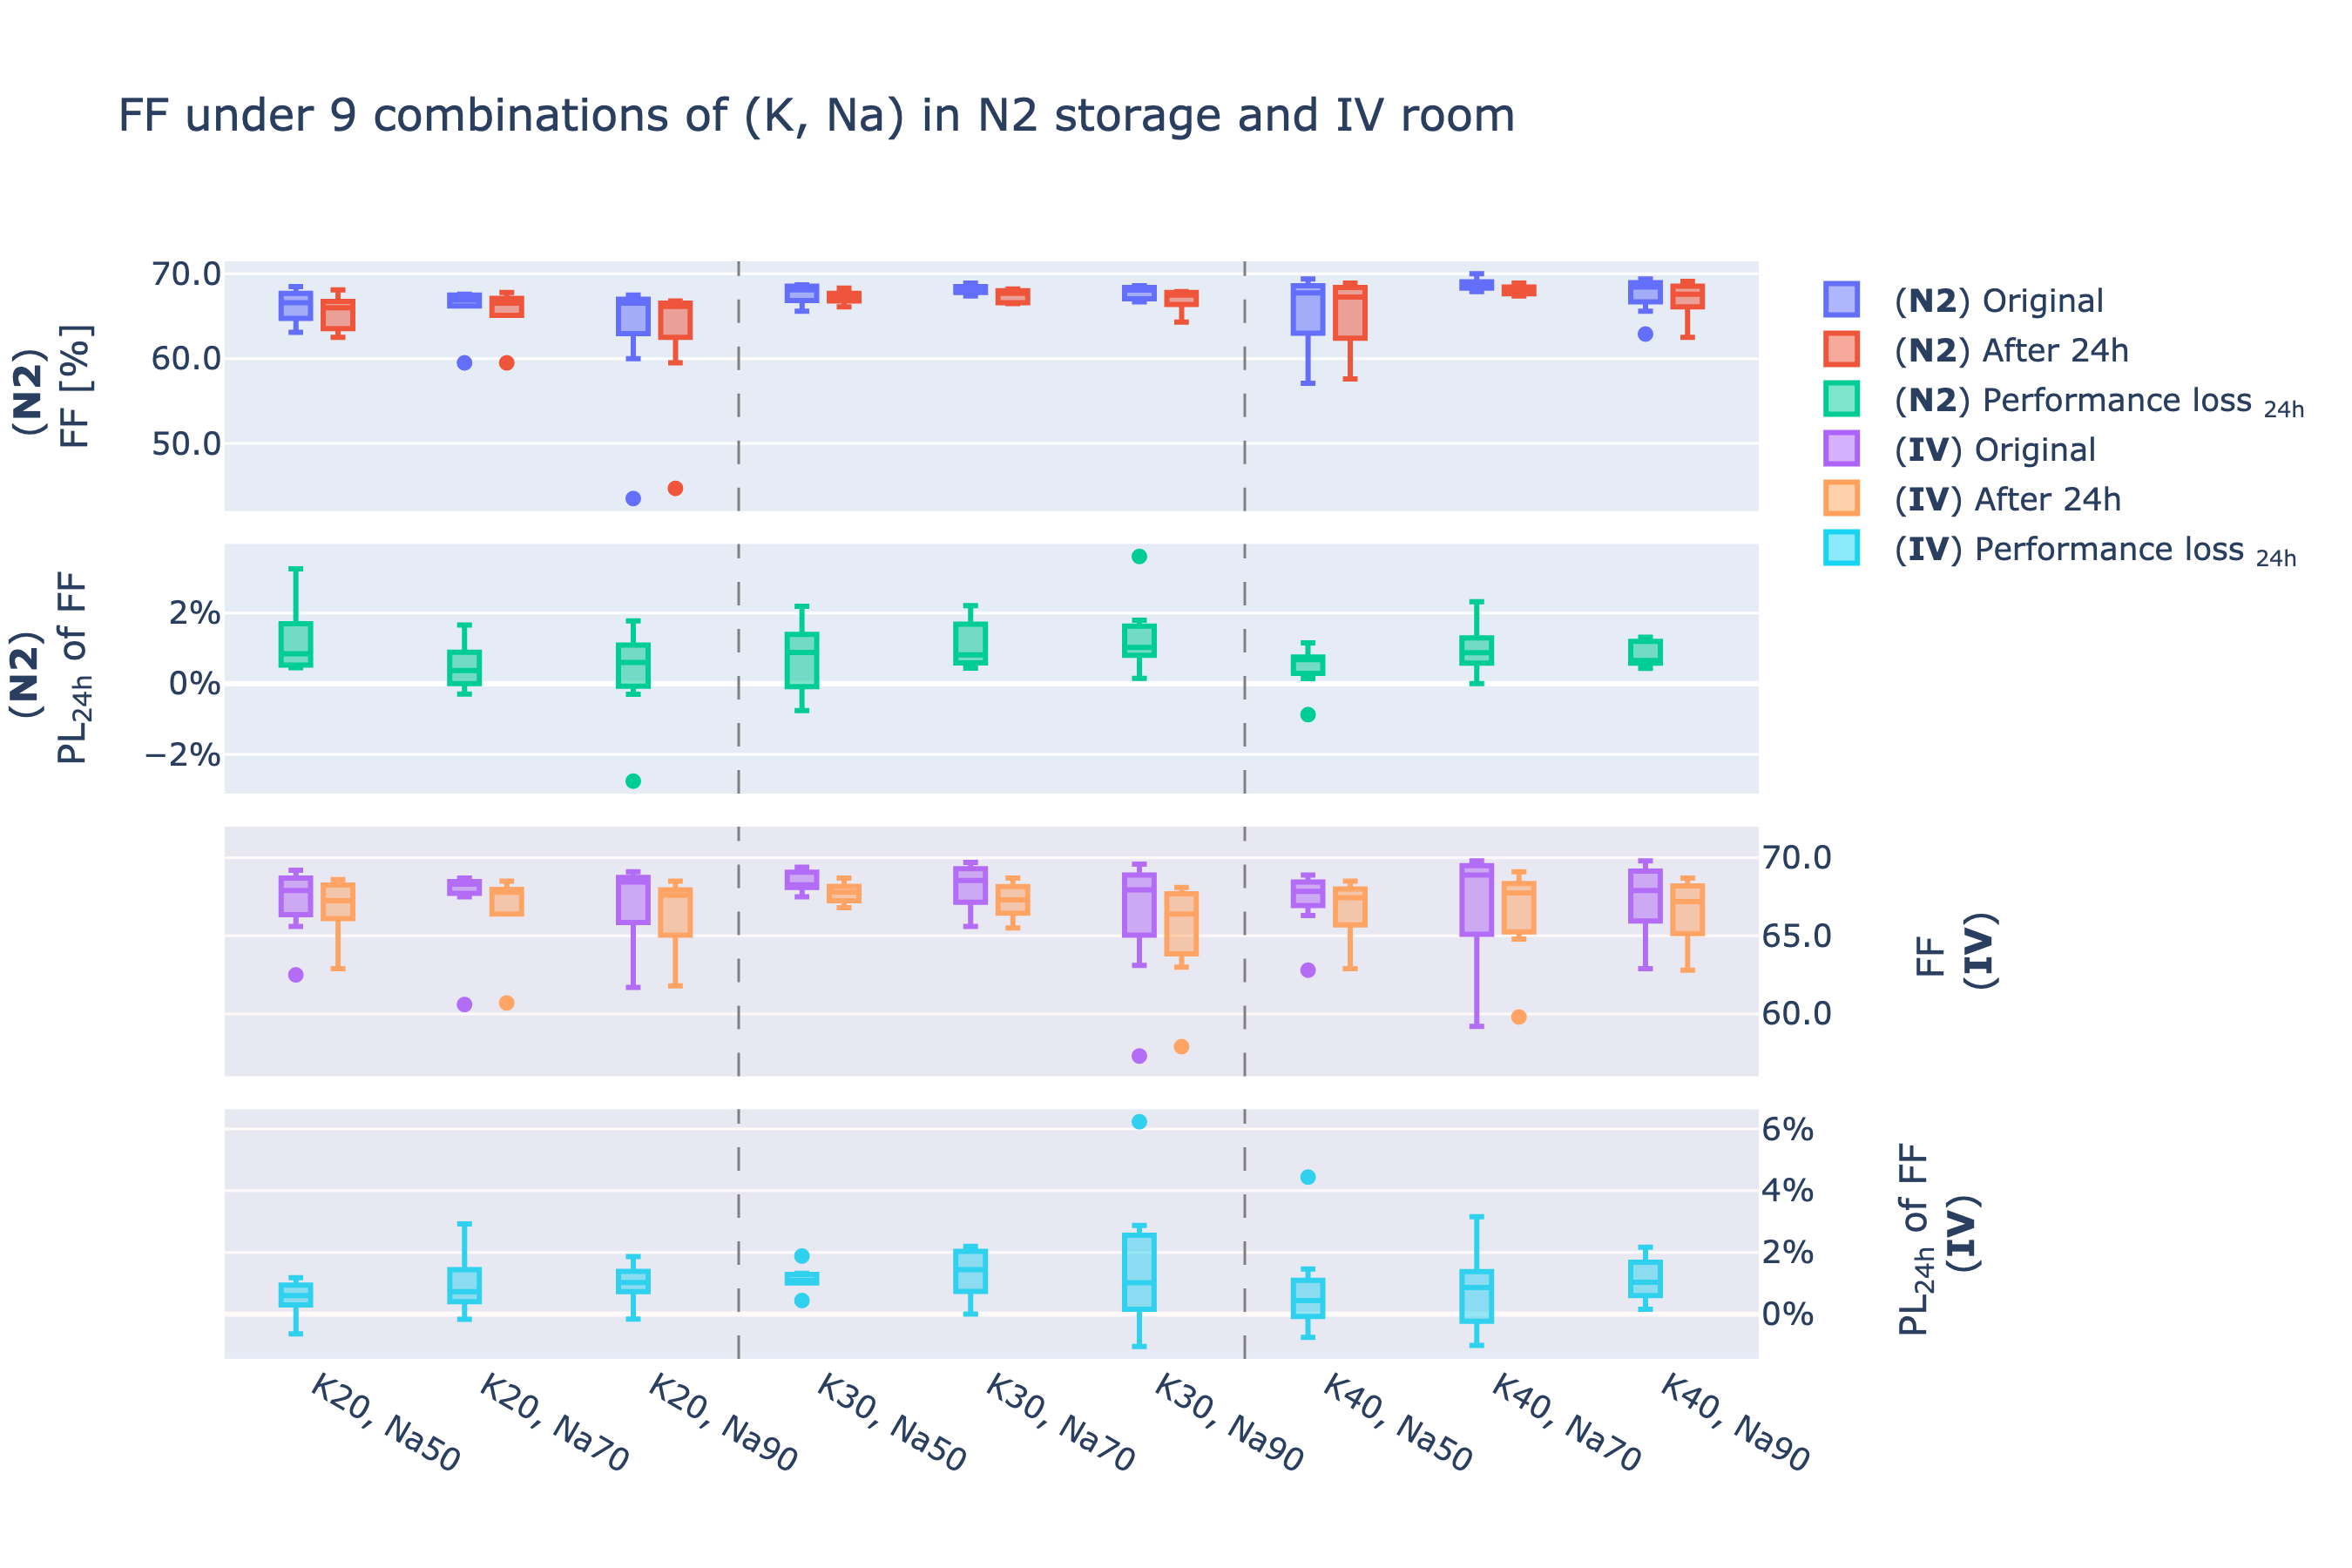

In [282]:
fig_Alkali_FF = make_subplots(rows=4, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_N2['FF [%]'], x = Alkali_test_FF_N2["Type"], 
           name = "(<b>N2</b>) Original", offsetgroup = "A"),
    row=1, col=1
)

fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_N2['FF [%].1'], x = Alkali_test_FF_N2["Type"], 
           name = "(<b>N2</b>) After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_N2['PL-FF'], x = Alkali_test_FF_N2["Type"], 
           name = "(<b>N2</b>) Performance loss <sub>24h</sub>", offsetgroup = "A"),
    row=2, col=1
)
#########
fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_IV['FF [%]'], x = Alkali_test_FF_IV["Type"], 
           name = "(<b>IV</b>) Original", offsetgroup = "A"),
    row=3, col=1
)

fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_IV['FF [%].1'], x = Alkali_test_FF_IV["Type"], 
           name = "(<b>IV</b>) After 24h", offsetgroup = "B"),
    row=3, col=1
)


fig_Alkali_FF.add_trace(
    go.Box(y=Alkali_test_FF_IV['PL-FF'], x = Alkali_test_FF_IV["Type"], 
           name = "(<b>IV</b>) Performance loss <sub>24h</sub>", offsetgroup = "A"),
    row=4, col=1
)

fig_Alkali_FF.add_hrect(y0=56, y1=72, col="all", row=3,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_FF.add_hrect(y0=-0.012, y1=0.066, col="all", row=4,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_FF.add_vline(
        x=2.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_FF.add_vline(
        x=5.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_FF.update_layout(title = "FF under 9 combinations of (K, Na) in N2 storage and IV room",
                     boxmode='group', height=600, width=900,boxgap=0.5,
                     yaxis=dict(title="(<b>N2</b>) <br>FF [%]",tickformat=",.1f"),
                     yaxis2=dict(title="(<b>N2</b>) <br>PL<sub>24h</sub> of FF",tickformat = ',.0%'),
                     yaxis3=dict(title="FF <br>(<b>IV</b>) ",side='right',tickformat=",.1f"),
                     yaxis4=dict(title="PL<sub>24h</sub> of FF <br>(<b>IV</b>)",side='right',tickformat = ',.0%')
                    ) 
fig_Alkali_FF.update_xaxes(tickangle=30)
fig_Alkali_FF.write_image("3.3 FF under 9 combinations of (K, Na) in N2 storage and IV room.png", scale=3, width=900, height=600) 
fig_Alkali_FF.show(renderer="png", scale=3, width=900, height=600)

# Check: Efficiency η

In [259]:
Alkali_test_η = Alkali_test[Alkali_test['PL-η'] < 0.1]
Alkali_test_η = Alkali_test_η[Alkali_test_η['PL-η'] > -0.1]
Alkali_test_η_N2 = Alkali_test_η[Alkali_test_η['Storage'] == "N2-storage"]
Alkali_test_η_IV = Alkali_test_η[Alkali_test_η['Storage'] == "IV-room"]

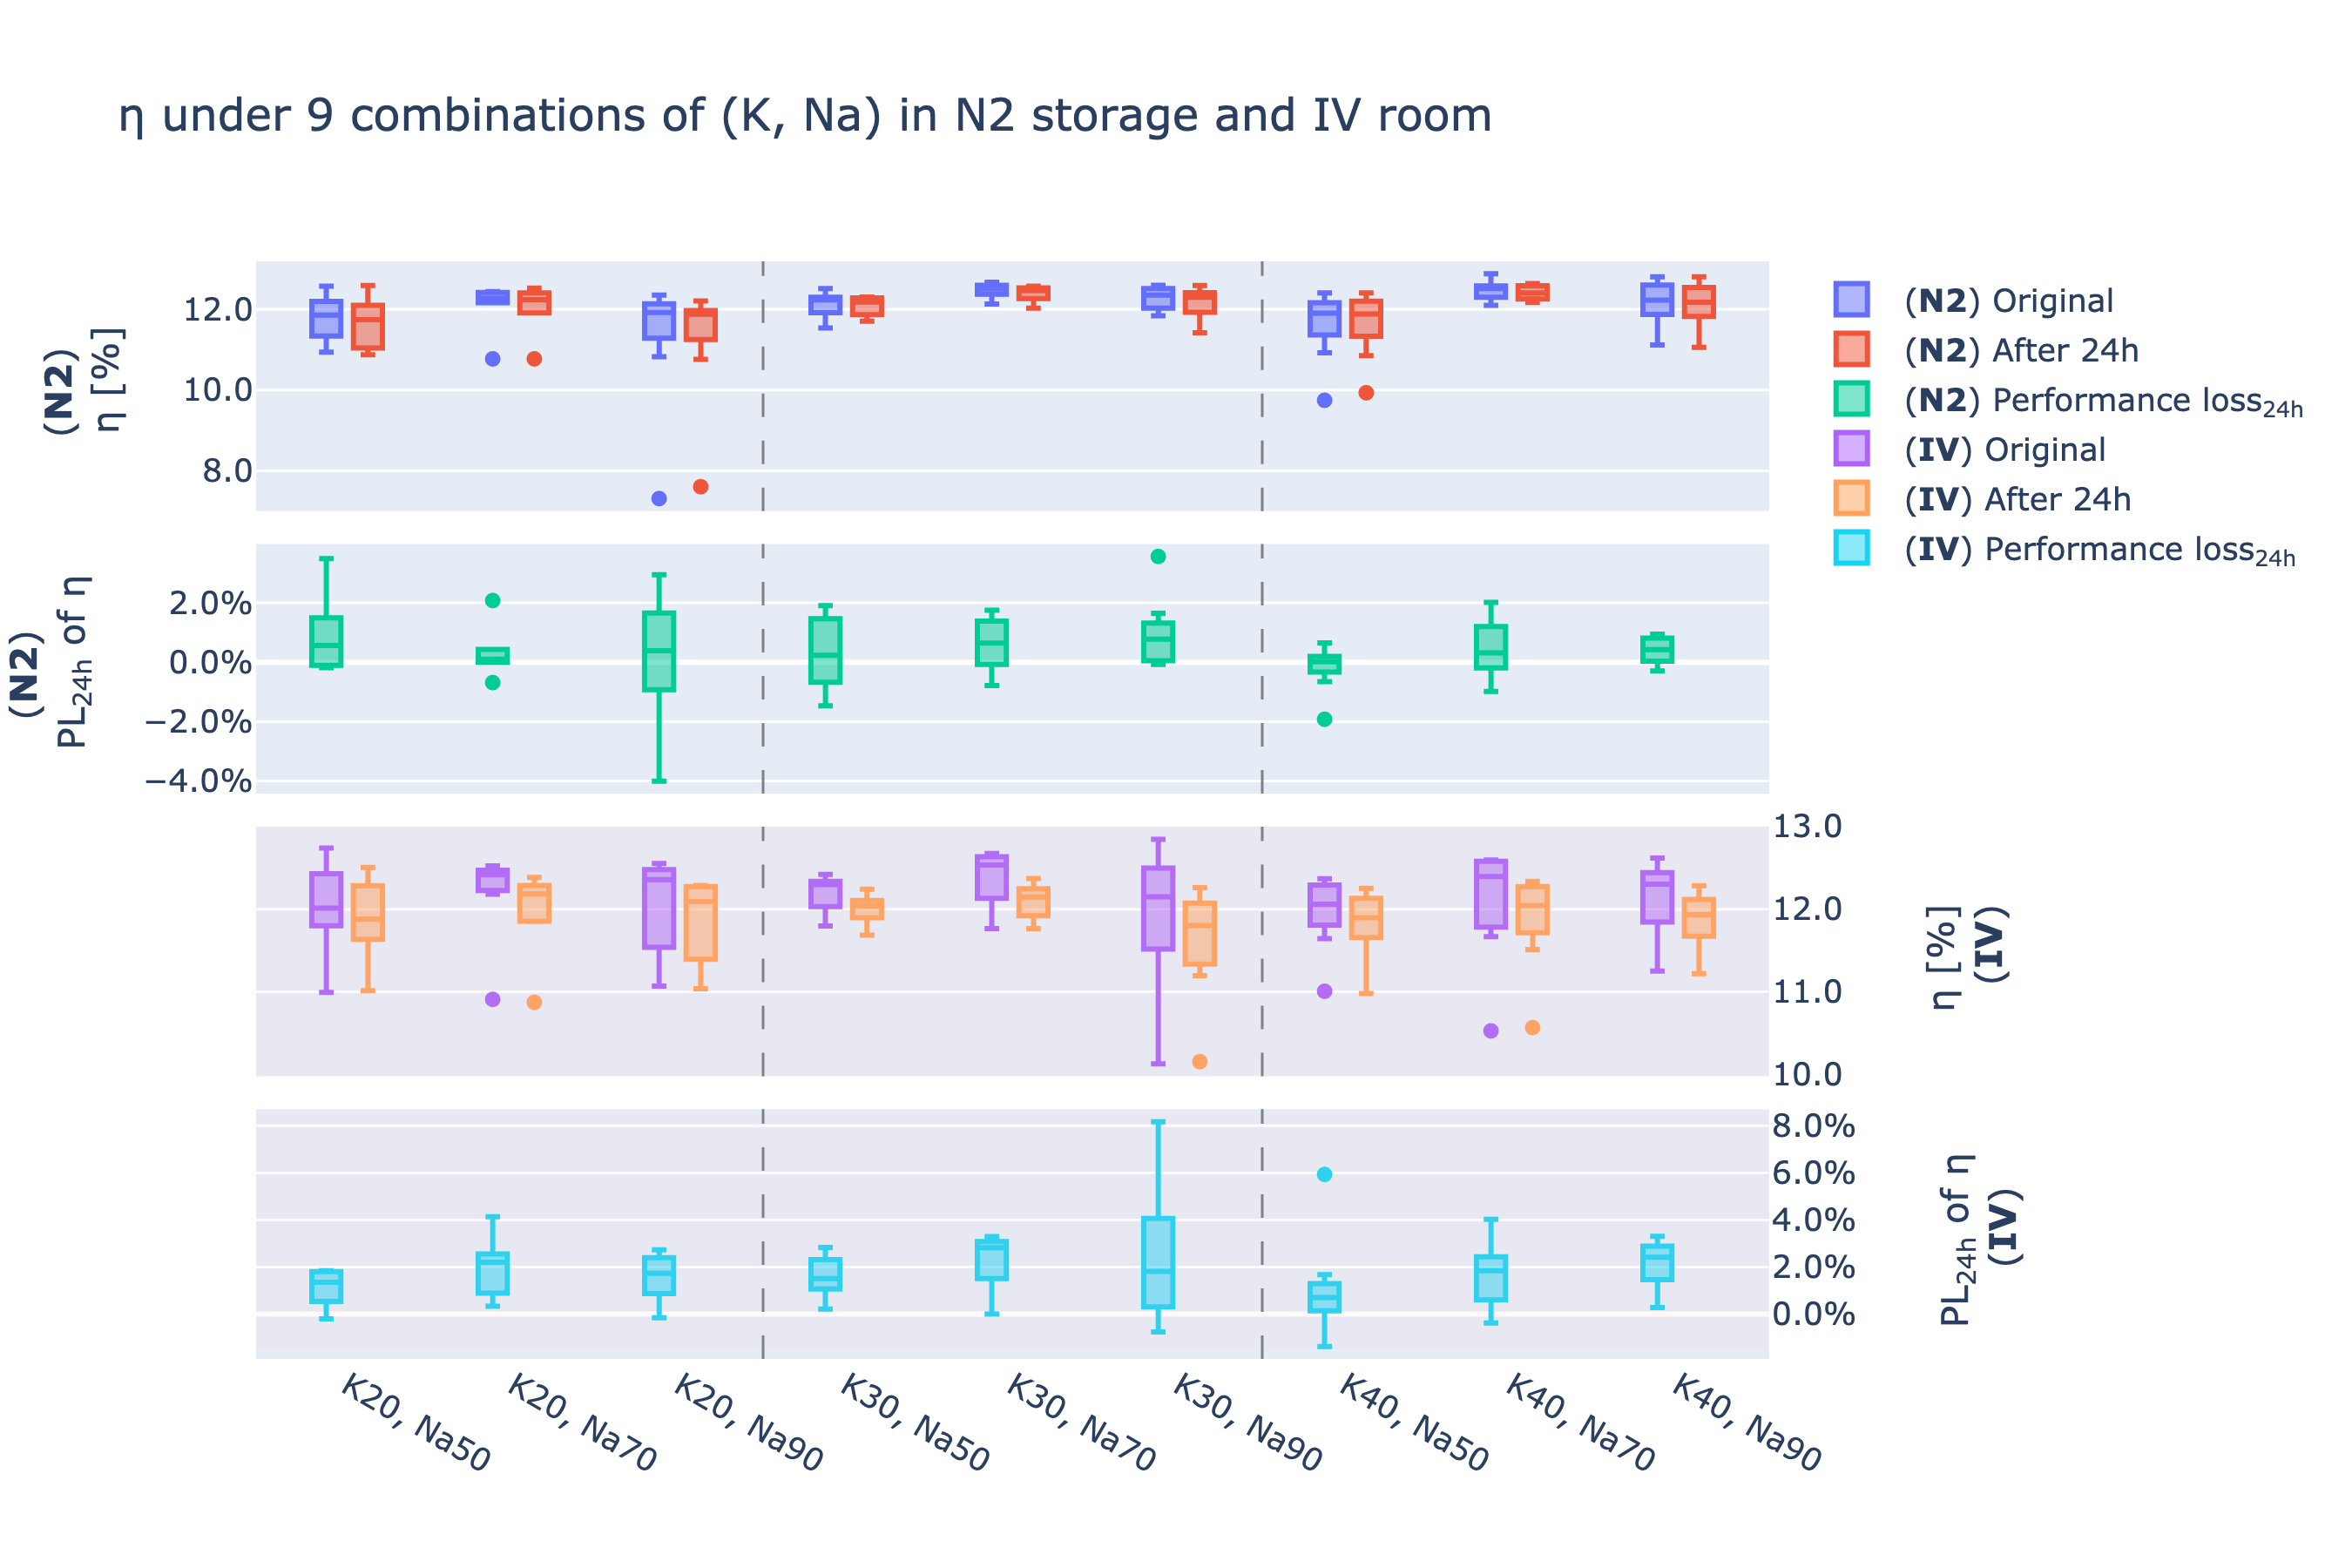

In [283]:
fig_Alkali_η = make_subplots(rows=4, cols=1,shared_xaxes = True,vertical_spacing=0.03)

fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_N2['η [%]'], x = Alkali_test_η_N2["Type"], 
           name = "(<b>N2</b>) Original", offsetgroup = "A"),
    row=1, col=1
)

fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_N2['η [%].1'], x = Alkali_test_η_N2["Type"], 
           name = "(<b>N2</b>) After 24h", offsetgroup = "B"),
    row=1, col=1
)


fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_N2['PL-η'], x = Alkali_test_η_N2["Type"], 
           name = "(<b>N2</b>) Performance loss<sub>24h</sub>", offsetgroup = "A"),
    row=2, col=1
)
#########
fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_IV['η [%]'], x = Alkali_test_η_IV["Type"], 
           name = "(<b>IV</b>) Original", offsetgroup = "A"),
    row=3, col=1
)

fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_IV['η [%].1'], x = Alkali_test_η_IV["Type"], 
           name = "(<b>IV</b>) After 24h", offsetgroup = "B"),
    row=3, col=1
)


fig_Alkali_η.add_trace(
    go.Box(y=Alkali_test_η_IV['PL-η'], x = Alkali_test_η_IV["Type"], 
           name = "(<b>IV</b>) Performance loss<sub>24h</sub>", offsetgroup = "A"),
    row=4, col=1
)

fig_Alkali_η.add_hrect(y0=10, y1=13, col="all", row=3,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_η.add_hrect(y0=-0.015, y1=0.085, col="all", row=4,
              fillcolor="pink", opacity=0.1, line_width=0)

fig_Alkali_η.add_vline(
        x=2.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_η.add_vline(
        x=5.5, line_width=1, line_dash="dash", 
        line_color="grey")

fig_Alkali_η.update_layout(title = "η under 9 combinations of (K, Na) in N2 storage and IV room",
    boxmode='group', height=700, width=900,boxgap=0.5,
                     yaxis=dict(title=" (<b>N2</b>) <br> η [%]",tickformat=".1f"),
                     yaxis2=dict(title="(<b>N2</b>) <br> PL<sub>24h</sub> of η",tickformat = ',.1%'),
                     yaxis3=dict(title="η [%] <br> (<b>IV</b>)",side='right',tickformat=".1f"),
                     yaxis4=dict(title="PL<sub>24h</sub> of η <br> (<b>IV</b>)", dtick= 0.02,
                                 side='right',tickformat = ',.1%')
                    ) 
fig_Alkali_η.update_xaxes(tickangle=30) 
fig_Alkali_η.show(renderer="png", scale=3, width=900, height=600)
fig_Alkali_η.write_image("3.4 η under 9 combinations of (K, Na) in N2 storage and IV room.png", scale=3, width=900, height=600) 

In [116]:
Alkali_test_ = pd.read_excel('C. Alkali test.xlsx', usecols='B:E, G:J, L:O', skiprows = 1)
Alkali_test_['K-content'] = "K" + Alkali_test_['K-content'].astype(str)
Alkali_test_['Na-content'] = "Na" + Alkali_test_['Na-content'].astype(str)
Alkali_test_['PL-Voc'] = abs(Alkali_test_['Voc [V]'] - Alkali_test_['Voc [V].1'])/ Alkali_test_['Voc [V]']
Alkali_test_['PL-Isc'] = abs(Alkali_test_['Isc [A]'] - Alkali_test_['Isc [A].1'])/ Alkali_test_['Isc [A]']
Alkali_test_['PL-FF']  = abs(Alkali_test_['FF [%]'] -  Alkali_test_['FF [%].1']) / Alkali_test_['FF [%]']
Alkali_test_['PL-η']   = abs(Alkali_test_['η [%]'] -   Alkali_test_['η [%].1'])  / Alkali_test_['η [%]']
Alkali_test_.tail()

,Id,K-content,Na-content,Storage,Voc [V],Isc [A],FF [%],η [%],Voc [V].1,Isc [A].1,FF [%].1,η [%].1,PL-Voc,PL-Isc,PL-FF,PL-η
139,1511091236,K40,Na70,IV-room,0.627,6.567,65.099998,11.901,0.625,6.537,65.699997,11.915,0.003190,0.004568,0.009217,0.001176
140,1511091237,K40,Na90,IV-room,0.626,6.558,67.300003,12.270,0.623,6.506,66.099998,11.892,0.004792,0.007929,0.017831,0.030807
141,1511091238,K40,Na90,IV-room,0.623,6.508,64.599998,11.626,0.620,6.486,64.199997,11.466,0.004815,0.003380,0.006192,0.013762
142,1511091239,K40,Na90,IV-room,0.625,6.424,67.699997,12.061,0.622,6.406,67.099998,11.875,0.004800,0.002802,0.008863,0.015422
143,1511091240,K40,Na90,IV-room,0.628,6.407,69.300003,12.381,0.623,6.389,67.800003,11.972,0.007962,0.002809,0.021645,0.033034


In [117]:
Alkali_test_.columns = ['Id', 'K-content', 'Na-content', 'Storage', 
                        'Voc-Original', 'Isc-Original', 'FF-Original', 'η-Original', 
                        'Voc-after24h', 'Isc-after24h', 'FF-after24h', 'η-after24h', 
                        'PL-Voc', 'PL-Isc', 'PL-FF', 'PL-η']
Alkali_test_l = pd.wide_to_long(Alkali_test_, ['Voc', 'Isc', 'FF', "η"], 
                                            i=['Id'], j='Type', sep='-', suffix=r'\w+')
Alkali_test_l.reset_index(inplace=True)
Alkali_test_l.tail()

,Id,Type,PL-FF,Na-content,PL-η,PL-Isc,K-content,Storage,PL-Voc,Voc,Isc,FF,η
283,1511091236,after24h,0.009217,Na70,0.001176,0.004568,K40,IV-room,0.003190,0.625,6.537,65.699997,11.915
284,1511091237,after24h,0.017831,Na90,0.030807,0.007929,K40,IV-room,0.004792,0.623,6.506,66.099998,11.892
285,1511091238,after24h,0.006192,Na90,0.013762,0.003380,K40,IV-room,0.004815,0.620,6.486,64.199997,11.466
286,1511091239,after24h,0.008863,Na90,0.015422,0.002802,K40,IV-room,0.004800,0.622,6.406,67.099998,11.875
287,1511091240,after24h,0.021645,Na90,0.033034,0.002809,K40,IV-room,0.007962,0.623,6.389,67.800003,11.972


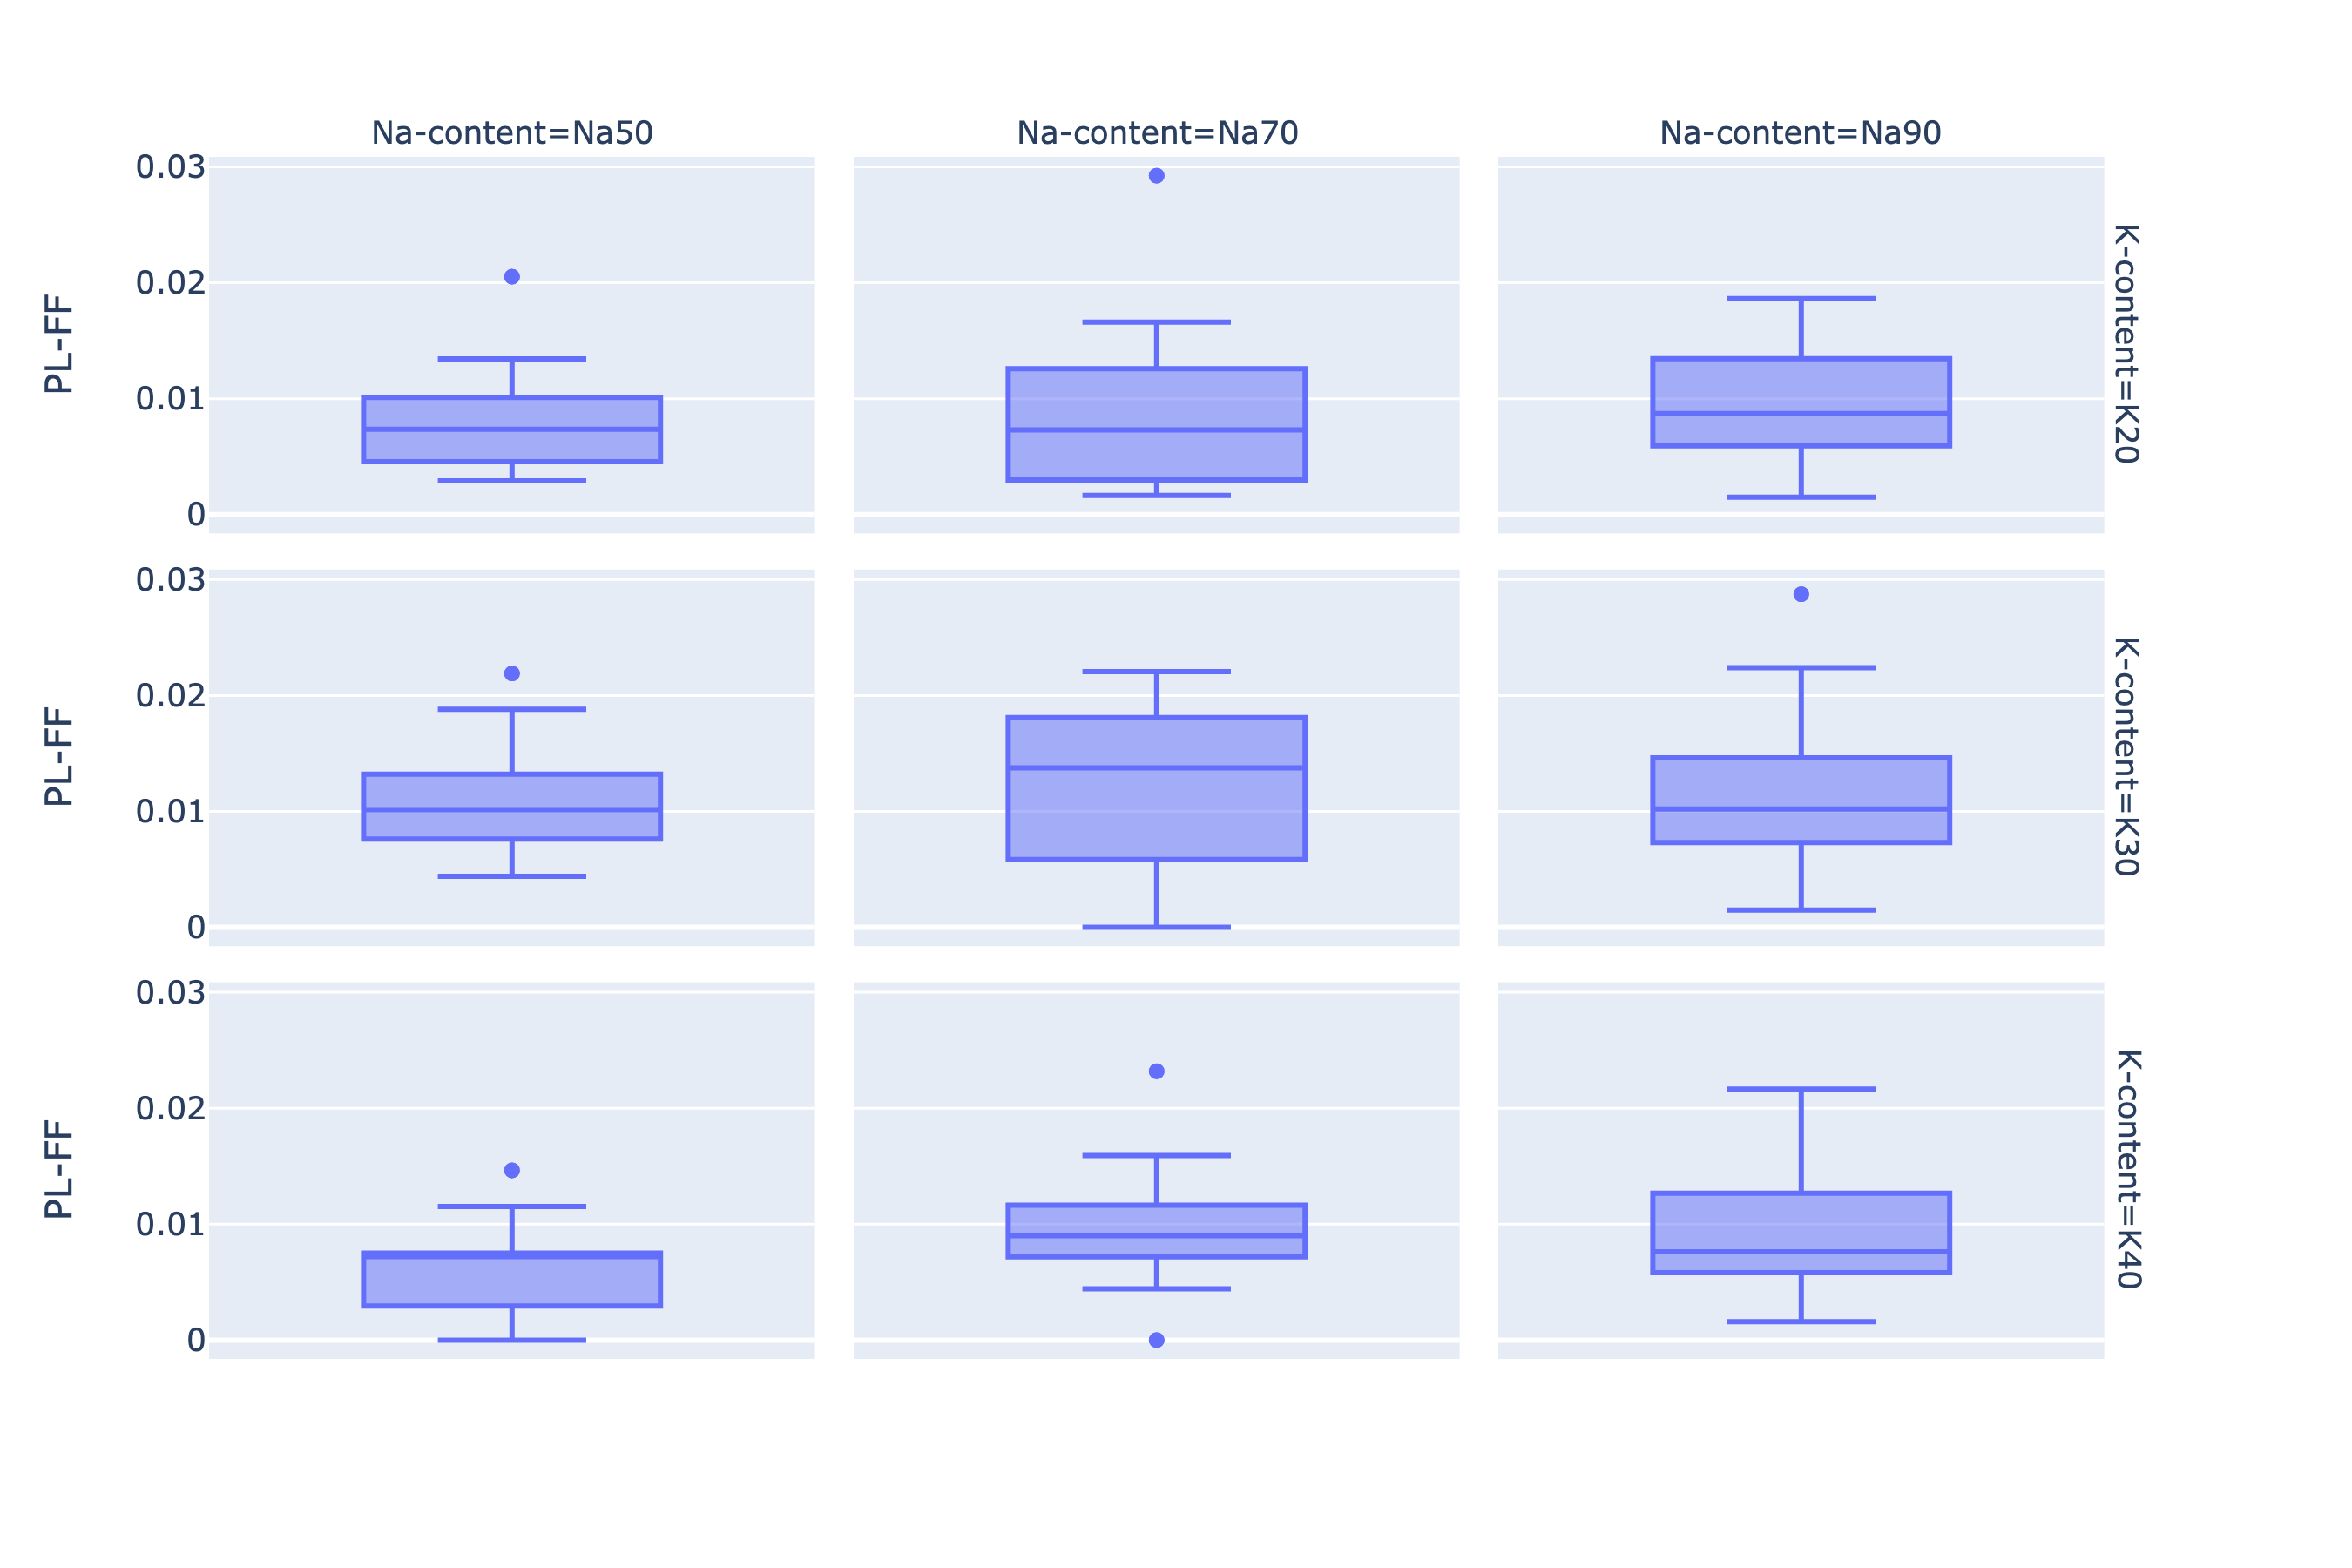

In [284]:
Alkali_test_l = Alkali_test_l[ Alkali_test_l['FF'] > 60]
Alkali_test_l = Alkali_test_l[ Alkali_test_l['PL-FF'] < 0.03]

fig_Alkali_FF_raw = px.box(Alkali_test_l, y="PL-FF", 
                           facet_col="Na-content", facet_row="K-content",
                          #category_orders={"Na-content": ["Na50", "Na70", "Na90"], "K-content": ["K20", "K30", "K40"]}
                          )
fig_Alkali_FF_raw.update_layout(boxmode='overlay')
fig_Alkali_FF_raw.show(renderer="png", scale=3, width=900, height=600)

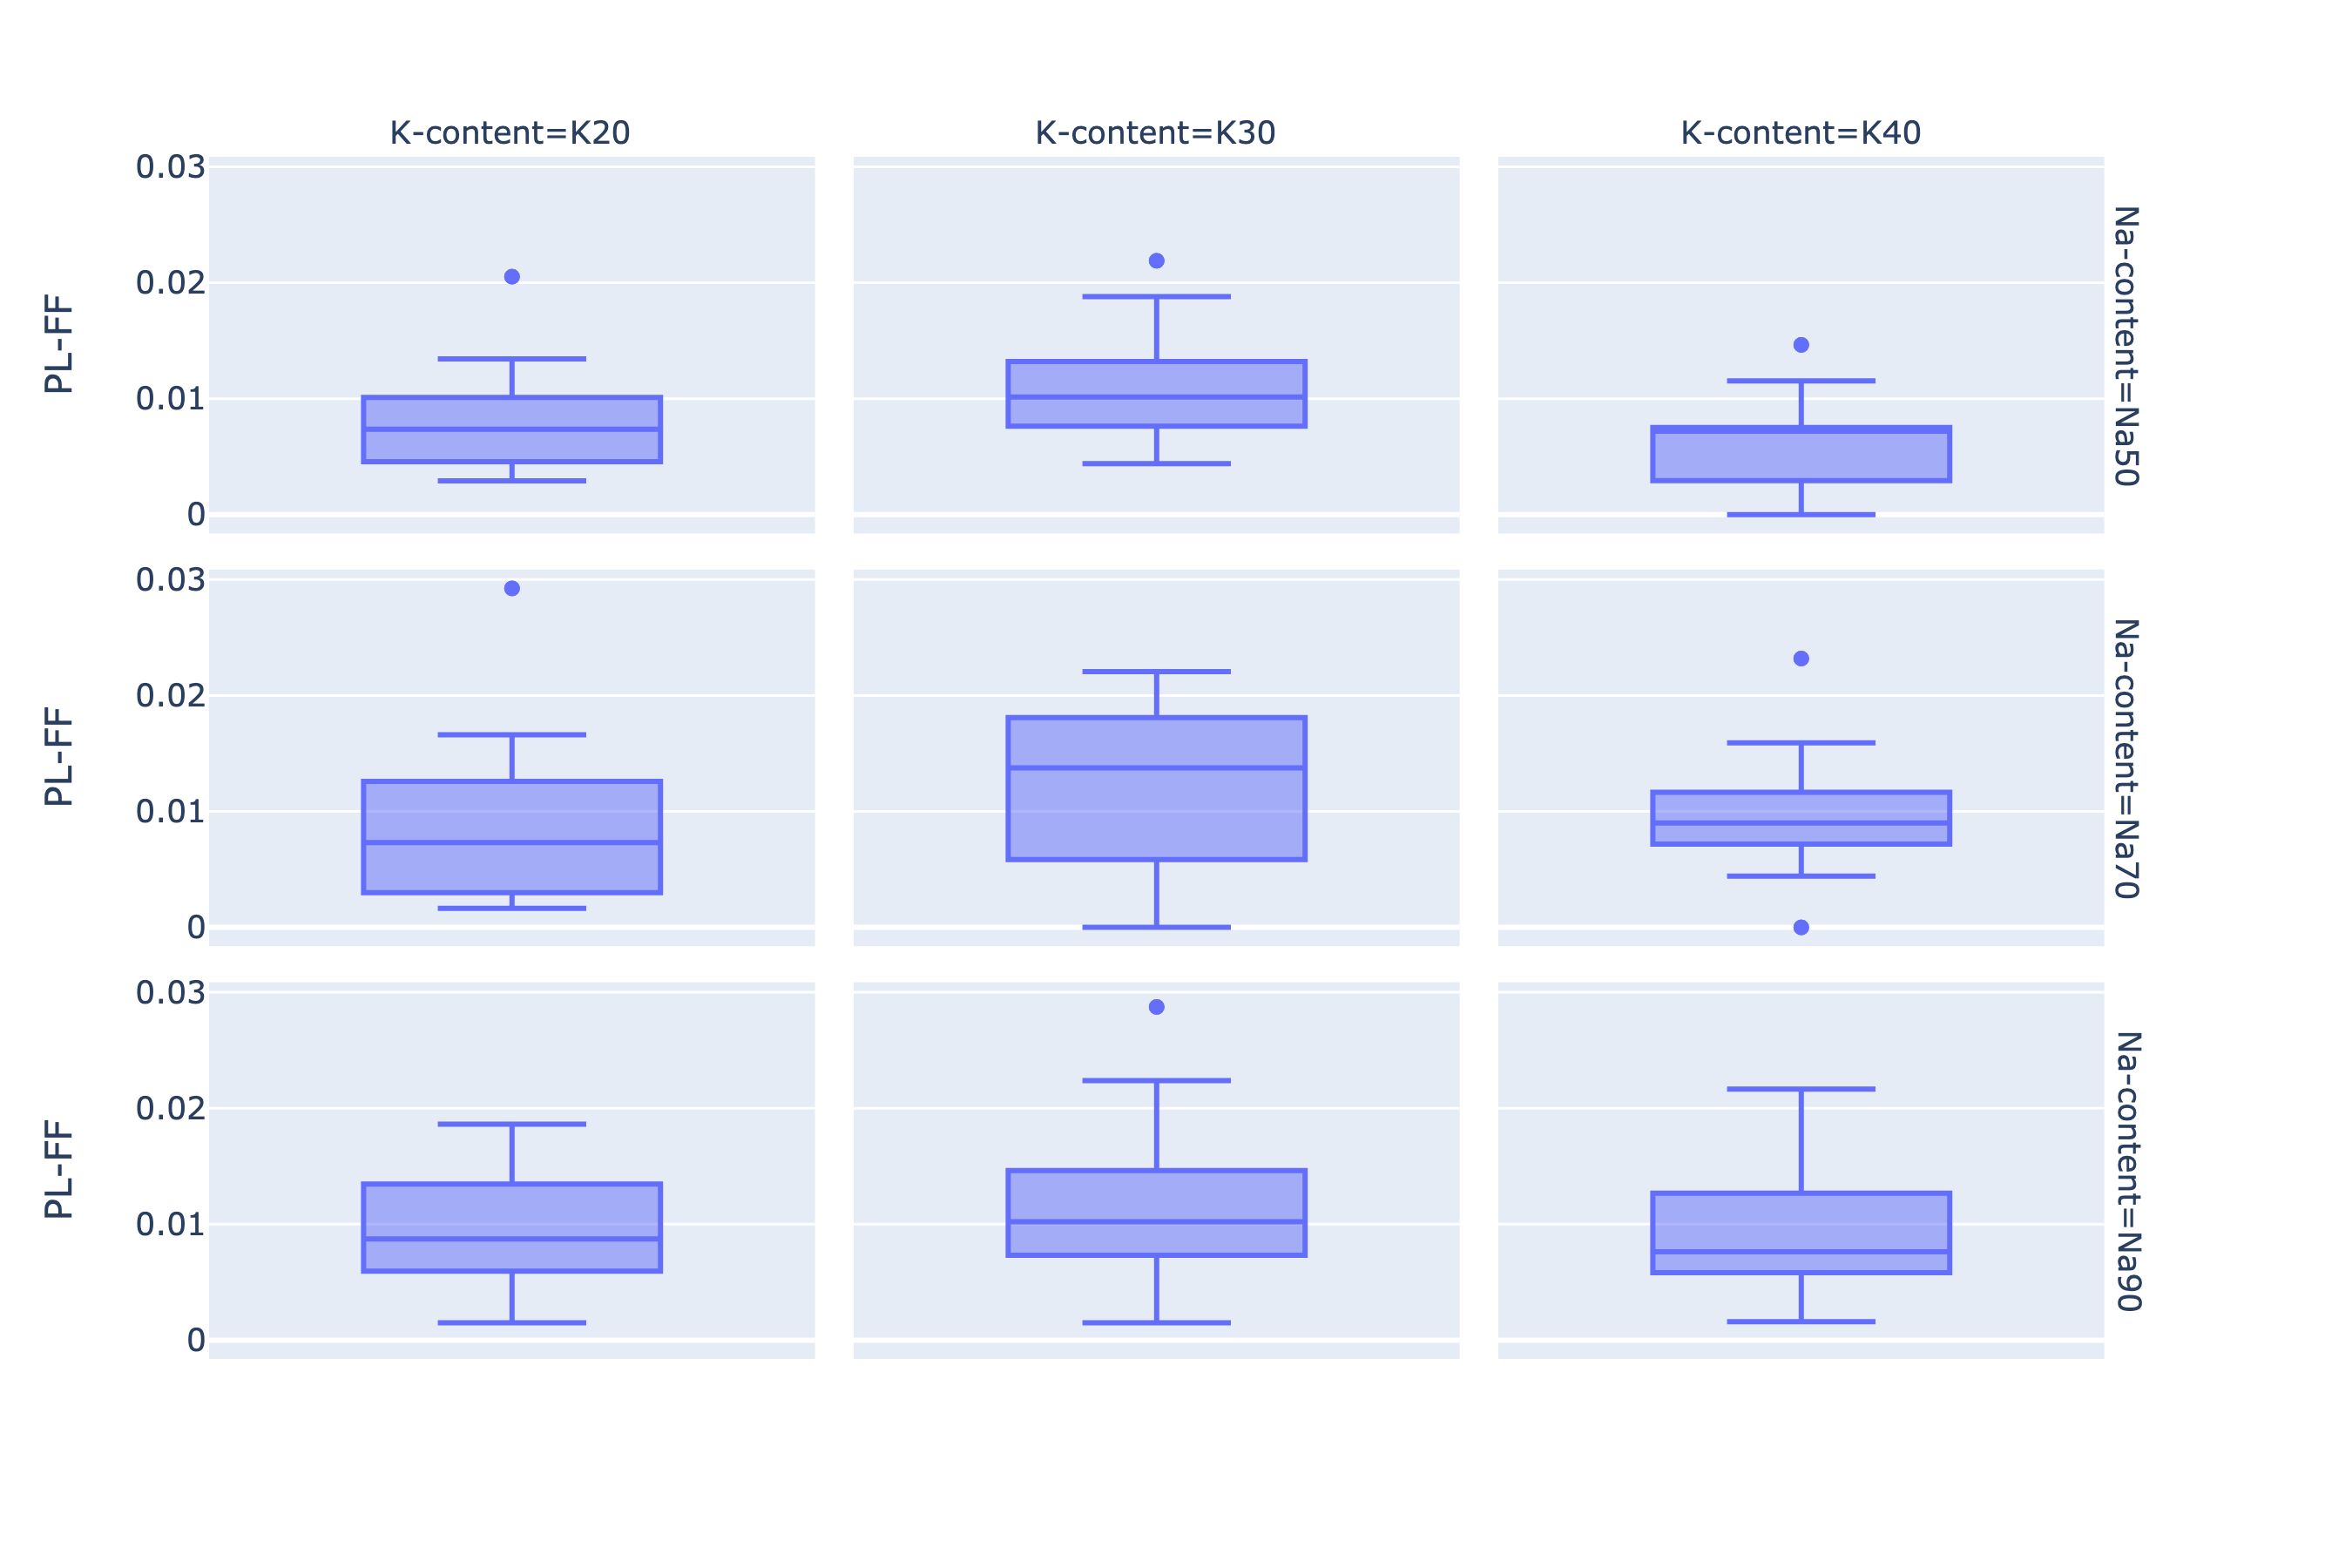

In [285]:
fig_Alkali_FF_raw = px.box(Alkali_test_l, y="PL-FF", 
                           facet_row="Na-content", facet_col="K-content",
                          #category_orders={"Na-content": ["Na50", "Na70", "Na90"], "K-content": ["K20", "K30", "K40"]}
                          )
fig_Alkali_FF_raw.update_layout(boxmode='overlay')
fig_Alkali_FF_raw.show(renderer="png", scale=3, width=900, height=600)